## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [5]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
# Permitir que o google drive acesse os arquivos externos
from google.colab import drive
drive.mount('/content/drive')

df_raw = pd.read_csv('/content/drive/MyDrive/[01] Ciência de Dados/EBAC/[Módulo 11] Desenvolvimento de aplicações com Python/Árvores II (Parte I árvore de regressão) [1]/housing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Preparar os dados
df = df_raw.dropna()

conversao_num = {
    'NEAR BAY':0,
    '<1H OCEAN':1,
    'INLAND':2,
    'NEAR OCEAN':3,
    'ISLAND':4
}

df.loc[:,'ocean_proximity'] = df['ocean_proximity'].map(conversao_num)

In [8]:
# Calcular e visualizar a matriz de correlação
matriz_cor = df.corr()

# Dividir os dados em treino e teste
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurando as arvores
regr_8 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

# Treinando os modelos
regr_8.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [9]:
# Construir a predição
y_pred_reg_8 = regr_8.predict(X_train)
y_pred_reg_2 = regr_2.predict(X_train)

# Cálculo do R2
R2_reg_8 = regr_8.score(X_train, y_train)
R2_reg_2 = regr_2.score(X_train, y_train)

In [10]:
y_pred_reg_8

array([228230.14468864,  90017.91907514, 245027.02702703, ...,
       362842.21052632, 289747.9704142 , 308627.15714286])

In [36]:
import numpy as np

# Seu valor de teste
valor_teste = np.array([1.000000, -0.924616, -0.109357, 0.045480, 0.069608, 0.100270, 0.056513, -0.045398, 0])

# Reformate o array para 2D
valor_teste = valor_teste.reshape(1, -1)

# Predição
predicao = regr_8.predict(valor_teste)

print(predicao)

[141814.5631068]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [12]:
ccp = regr_8.cost_complexity_pruning_path(X_train, y_train)
ccp

{'ccp_alphas': array([0.00000000e+00, 1.10118683e+01, 3.37238468e+03, 4.64350300e+04,
        7.07699131e+04, 8.00492136e+04, 8.17597577e+04, 1.02877116e+05,
        1.23373710e+05, 1.30184959e+05, 1.40658418e+05, 2.51510109e+05,
        2.60165694e+05, 2.72564108e+05, 2.76582344e+05, 2.78452480e+05,
        2.98142277e+05, 3.27972535e+05, 3.70050412e+05, 3.73383455e+05,
        3.86650924e+05, 3.89089838e+05, 4.07855133e+05, 4.65107812e+05,
        4.83635147e+05, 4.86201198e+05, 5.38929531e+05, 5.95045249e+05,
        6.50270153e+05, 6.57958556e+05, 7.36230148e+05, 7.52975309e+05,
        7.54021017e+05, 7.82612398e+05, 8.28282258e+05, 8.65257202e+05,
        9.00488671e+05, 9.29142910e+05, 9.36308553e+05, 9.62272182e+05,
        9.74781228e+05, 9.95298241e+05, 1.00275923e+06, 1.00869859e+06,
        1.09207820e+06, 1.09555151e+06, 1.11588612e+06, 1.14862256e+06,
        1.14980521e+06, 1.18145275e+06, 1.23421162e+06, 1.28131984e+06,
        1.29789062e+06, 1.32112958e+06, 1.32507401

Text(0, 0.5, 'impureza total das folhas')

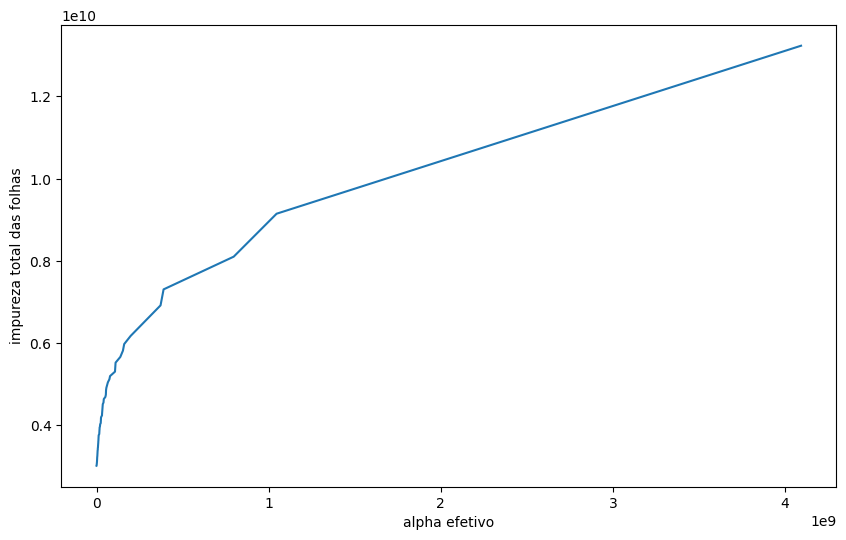

In [13]:
ccp_alphas, impurities = ccp.ccp_alphas, ccp.impurities

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, impurities)
plt.xlabel('alpha efetivo')
plt.ylabel('impureza total das folhas')

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [14]:
clfs = []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeRegressor(ccp_alpha = ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

Text(0, 0.5, 'impureza total das folhas')

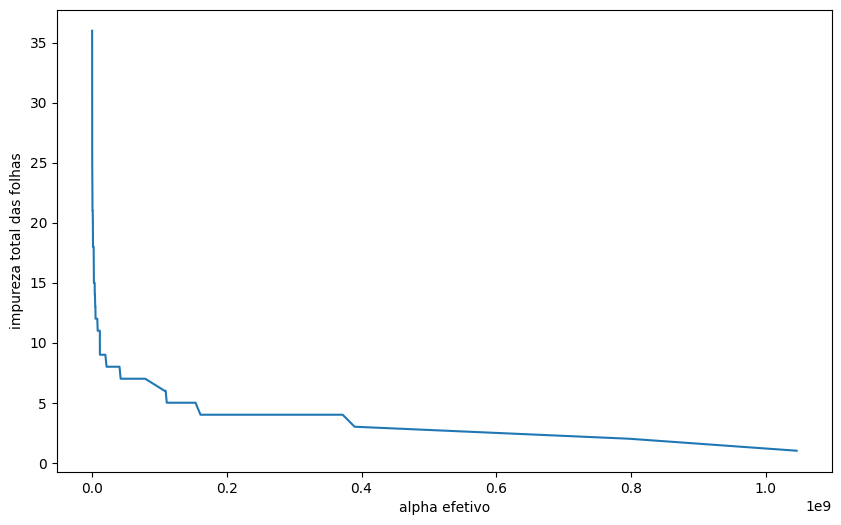

In [15]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel('alpha efetivo')
plt.ylabel('impureza total das folhas')

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [16]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

print(train_scores)
print(test_scores)


[0.0, 3171.67352257433, 4534238.93480788, 81960401.38990541, 122325155.58195518, 139622908.59195292, 143573563.39484203, 178568142.7785039, 208358411.35757753, 219398509.83770776, 233778022.1094416, 391906374.8670122, 403419589.48400366, 420096000.6496838, 428458277.8365709, 429567632.1755921, 458388527.67187107, 500474785.76846534, 548819470.1465722, 552167889.6319145, 571500873.1010933, 573826802.8969693, 598100386.2426587, 654799702.6123583, 674373210.7574674, 677767211.4602269, 730491890.3150989, 779429660.4465344, 833885990.0748664, 843063567.9688478, 914737238.9123509, 936432258.8242247, 937939363.3177333, 956863298.4030172, 986762538.0864143, 1019878535.5468173, 1043336543.7908938, 1061246541.0520208, 1073861837.0690181, 1101919526.2666254, 1117976812.108143, 1128262682.3390613, 1139248837.6500998, 1143827291.6161382, 1207081983.8228812, 1216281944.072498, 1240610683.5027027, 1279252799.5424798, 1276584410.3725758, 1298683312.037135, 1340899504.7672267, 1380084529.534709, 139425

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

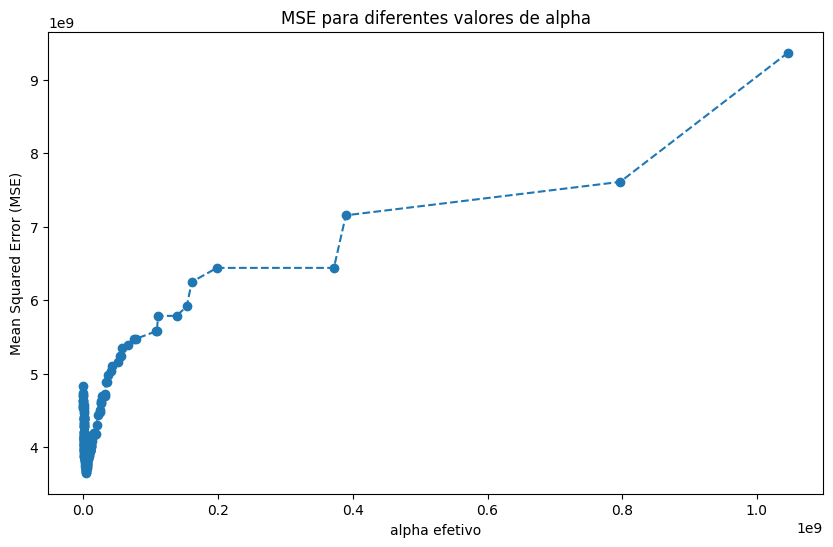

In [26]:
# Criando uma lista para calcular o MSE de cada árvore
mse_values = []

for clf in clfs:
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Visualizar os MSEs em gráfico
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], mse_values[:-1], marker='o', linestyle='--')
plt.xlabel('alpha efetivo')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE para diferentes valores de alpha')
plt.show()


In [29]:
# Encontre o valor de alpha que minimiza o MSE
min_mse_index = mse_values.index(min(mse_values))
menor_alpha = ccp_alphas[min_mse_index]

print(f'O menor valor de alpha para o MSE é: {menor_alpha}')


O menor valor de alpha para o MSE é: 3948645.763958916


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [33]:
from sklearn.metrics import r2_score

# Calcular o R2 com os dados da árvore acima
y_pred_R2 = clfs[min_mse_index].predict(X_test)
r2_best = r2_score(y_test, y_pred_R2)

print(f'O R-quadrado da árvore com alpha = {best_alpha} é: {r2_best}')


O R-quadrado da árvore com alpha = 3948645.763958916 é: 0.7328946560789757


### 7. Visualize esta árvore.

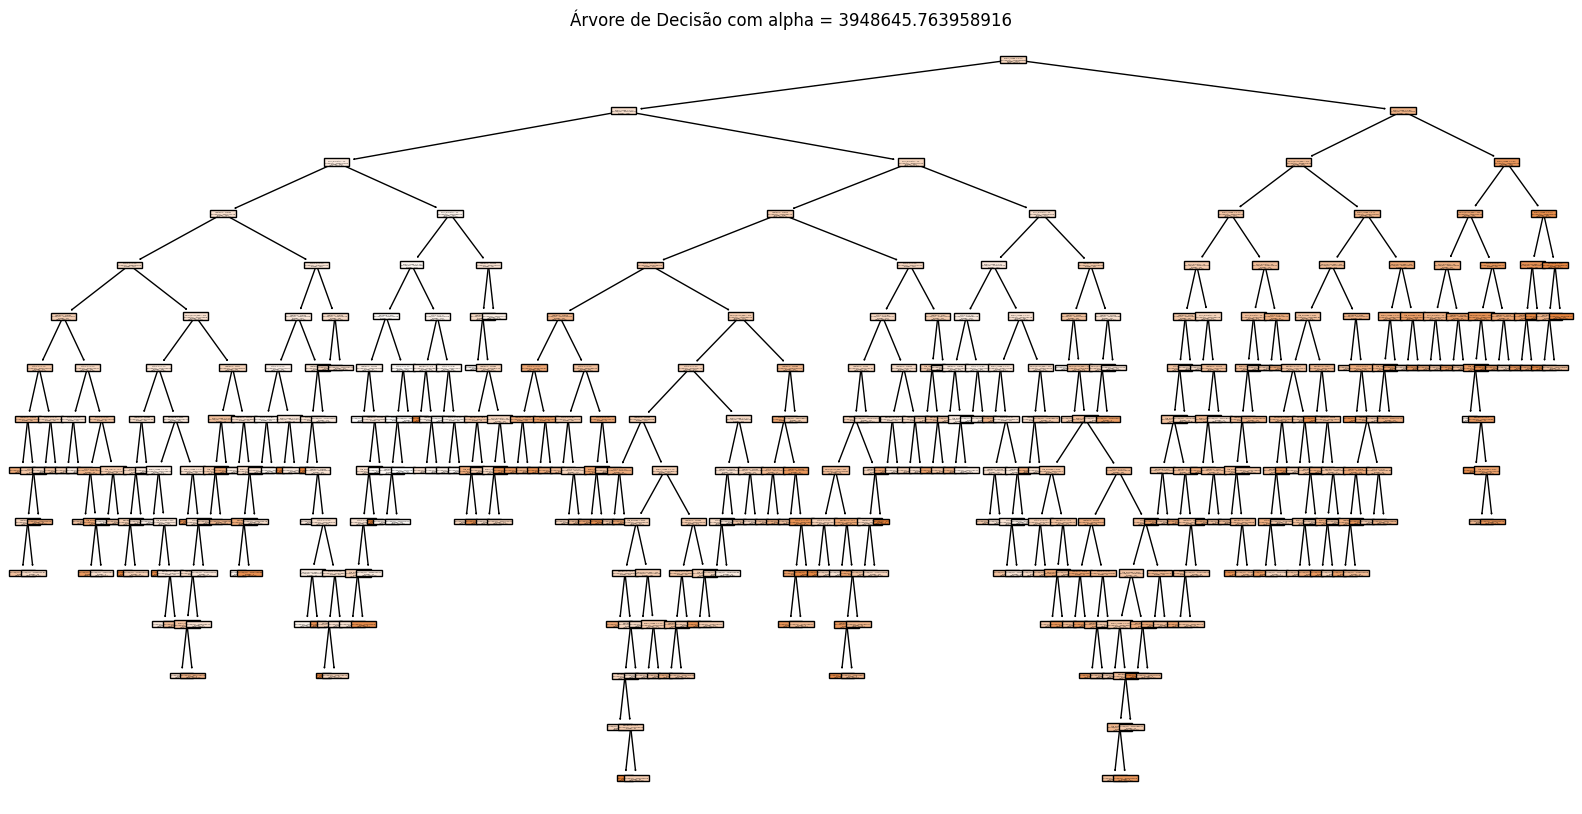

In [35]:
from sklearn.tree import plot_tree

# Criar a figura e os eixos
plt.figure(figsize=(20,10))

# Visualizar a árvore de decisão
plot_tree(clfs[min_mse_index], filled=True, feature_names=X_train.columns)
plt.title(f'Árvore de Decisão com alpha = {best_alpha}')
plt.show()
